In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

## Carga data

In [39]:
infile = open('cleandata_pickle.pickle','rb')
data_clean = pickle.load(infile)
infile.close()

### Agregar variables temporales

In [40]:
data_clean['dow_creacion'] = data_clean['dttm_creacion'].dt.dayofweek
data_clean['hora_creacion'] = data_clean['dttm_creacion'].dt.hour
data_clean['mes_creacion'] = data_clean['dttm_creacion'].dt.month
data_clean['año_creacion'] = data_clean['dttm_creacion'].dt.year
data_clean['fecha_creacion'] = data_clean['dttm_creacion'].dt.floor('D')
data_clean['dow_cierre'] = data_clean['dttm_cierre'].dt.dayofweek
data_clean['hora_cierre'] = data_clean['dttm_cierre'].dt.hour
data_clean['mes_cierre'] = data_clean['dttm_cierre'].dt.month
data_clean['año_cierre'] = data_clean['dttm_cierre'].dt.year
data_clean['fecha_cierre'] = data_clean['dttm_cierre'].dt.floor('D')

### Cambiar a minúsculas las variables  `string`

In [49]:
data_clean['clas_con_f_alarma'] = data_clean['clas_con_f_alarma'].str.lower().replace(" ", "_", regex = True, inplace=False)
data_clean['tipo_entrada'] = data_clean['tipo_entrada'].str.lower().replace(" ", "_", regex = True, inplace=False).str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
data_clean.head()

,folio,codigo_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,dttm_creacion,...,dow_creacion,hora_creacion,mes_creacion,año_creacion,fecha_creacion,dow_cierre,hora_cierre,mes_cierre,año_cierre,fecha_cierre
1164271,C4/131231/03508,A,alvaro obregon,lesionado_atropellado,19.33929,-99.25598,urgencias_medicas,llamada_del_066,alvaro obregon,2013-12-31 23:21:38,...,1,23,12,2013,2013-12-31,2,1,1,2014,2014-01-01
1164423,C4/131231/02371,N,alvaro obregon,accidente_choque_sin_lesionados,19.37831,-99.20090,emergencia,llamada_del_066,alvaro obregon,2013-12-31 18:21:47,...,1,18,12,2013,2013-12-31,3,0,1,2014,2014-01-02
372612,C4/140101/04189,A,alvaro obregon,accidente_choque_con_lesionados,19.36336,-99.19104,urgencias_medicas,llamada_del_066,alvaro obregon,2014-01-01 21:45:43,...,2,21,1,2014,2014-01-01,2,23,1,2014,2014-01-01
372622,C4/140101/04201,A,alvaro obregon,accidente_choque_sin_lesionados,19.36348,-99.19145,emergencia,llamada_del_066,alvaro obregon,2014-01-01 21:46:46,...,2,21,1,2014,2014-01-01,2,21,1,2014,2014-01-01
372628,C4/140101/01293,A,alvaro obregon,accidente_choque_sin_lesionados,19.38161,-99.20009,emergencia,llamada_del_066,alvaro obregon,2014-01-01 06:50:48,...,2,6,1,2014,2014-01-01,2,8,1,2014,2014-01-01


### Agrega columna label. Identifica las llamadas falsas de las verdaderas

Es importante hacer una distinción entre "registros recibidos" e "incidentes reales".

Los registros recibidos contemplan todos los códigos de cierre, mientras que para conservar los incidentes es necesario quitar las solicitudes de informacion, y los incidentes repetidos, es decir, códigos de cierre *D* e *I*.

In [50]:
data_incidentes = data_clean.copy(deep = True).query('codigo_cierre not in ["D", "I"]') 
data_incidentes

,folio,codigo_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,dttm_creacion,...,dow_creacion,hora_creacion,mes_creacion,año_creacion,fecha_creacion,dow_cierre,hora_cierre,mes_cierre,año_cierre,fecha_cierre
1164271,C4/131231/03508,A,alvaro obregon,lesionado_atropellado,19.339290,-99.255980,urgencias_medicas,llamada_del_066,alvaro obregon,2013-12-31 23:21:38,...,1,23,12,2013,2013-12-31,2,1,1,2014,2014-01-01
1164423,C4/131231/02371,N,alvaro obregon,accidente_choque_sin_lesionados,19.378310,-99.200900,emergencia,llamada_del_066,alvaro obregon,2013-12-31 18:21:47,...,1,18,12,2013,2013-12-31,3,0,1,2014,2014-01-02
372612,C4/140101/04189,A,alvaro obregon,accidente_choque_con_lesionados,19.363360,-99.191040,urgencias_medicas,llamada_del_066,alvaro obregon,2014-01-01 21:45:43,...,2,21,1,2014,2014-01-01,2,23,1,2014,2014-01-01
372622,C4/140101/04201,A,alvaro obregon,accidente_choque_sin_lesionados,19.363480,-99.191450,emergencia,llamada_del_066,alvaro obregon,2014-01-01 21:46:46,...,2,21,1,2014,2014-01-01,2,21,1,2014,2014-01-01
372628,C4/140101/01293,A,alvaro obregon,accidente_choque_sin_lesionados,19.381610,-99.200090,emergencia,llamada_del_066,alvaro obregon,2014-01-01 06:50:48,...,2,6,1,2014,2014-01-01,2,8,1,2014,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380278,C5/201031/08038,N,xochimilco,accidente_choque_sin_lesionados,19.286861,-99.102211,emergencia,llamada_del_911,xochimilco,2020-10-31 21:27:39,...,5,21,10,2020,2020-10-31,5,21,10,2020,2020-10-31
1380309,C5/201031/08206,A,xochimilco,accidente_choque_con_lesionados,19.234770,-99.120500,urgencias_medicas,llamada_del_911,xochimilco,2020-10-31 21:39:56,...,5,21,10,2020,2020-10-31,5,22,10,2020,2020-10-31
1380319,C5/201031/02258,A,xochimilco,accidente_choque_sin_lesionados,19.283730,-99.129490,emergencia,llamada_del_911,xochimilco,2020-10-31 06:51:39,...,5,6,10,2020,2020-10-31,5,9,10,2020,2020-10-31
1382445,C5/201031/07490,N,xochimilco,accidente_choque_con_lesionados,19.210047,-99.132963,urgencias_medicas,llamada_del_911,xochimilco,2020-10-31 20:41:36,...,5,20,10,2020,2020-10-31,5,22,10,2020,2020-10-31


In [51]:
data_incidentes['label'] = np.where((data_incidentes['codigo_cierre'] == 'N') | (data_incidentes['codigo_cierre'] == 'F') ,1,0 )

Corroboramos que la columna label es correcta

In [52]:
data_incidentes[['label','codigo_cierre']].value_counts()

label  codigo_cierre
0      A                599965
1      N                271600
       F                 10485
dtype: int64

## GEDA

### ¿Coincide latitud y longitud con la delegación correspondiente?

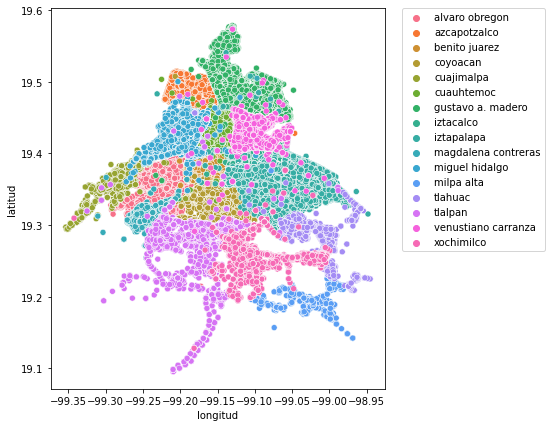

In [6]:
f = plt.subplots(figsize = (6,7))

sns.scatterplot(data = data_clean[data_clean['año_cierre'] == 2019] , y = "latitud", x = "longitud", hue = "delegacion_cierre")

ax = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Llamadas por día de la semana y hora de creación

In [7]:
dow_x_hora_creacion = data_clean[['dow_creacion', 'hora_creacion']].groupby(['dow_creacion', 'hora_creacion']).\
size().reset_index(name='n').pivot("hora_creacion", "dow_creacion","n")

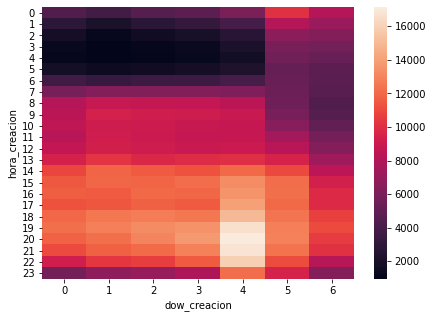

In [8]:
f = plt.subplots(figsize = (7,5))
ax = sns.heatmap(dow_x_hora_creacion)

### Llamadas por día de la semana y mes de creación

Cuando más llamadas hay es los viernes entre 18 y 22 hrs. Cuando menos llamadas hay es de lunes a viernes de 12am a 6am

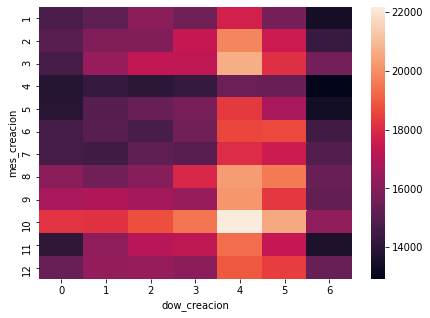

In [9]:
dow_x_mes_creacion = data_clean[['dow_creacion', 'mes_creacion']].groupby(['dow_creacion', 'mes_creacion']).\
size().reset_index(name='n').pivot("mes_creacion", "dow_creacion","n")

f = plt.subplots(figsize = (7,5))
ax = sns.heatmap(dow_x_mes_creacion)

### Llamadas por año y mes de creación

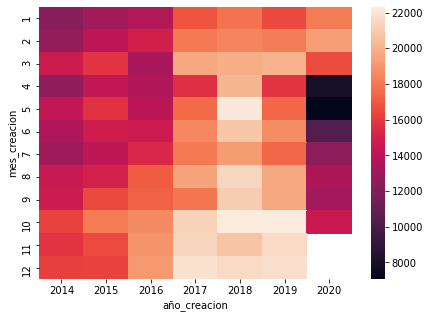

In [10]:
año_x_mes_creacion = data_clean[['año_creacion', 'mes_creacion']].groupby(['año_creacion', 'mes_creacion']).\
size().reset_index(name='n').query('año_creacion != 2013').pivot("mes_creacion", "año_creacion","n")

f = plt.subplots(figsize = (7,5))
ax = sns.heatmap(año_x_mes_creacion)

### Llamadas por delegación

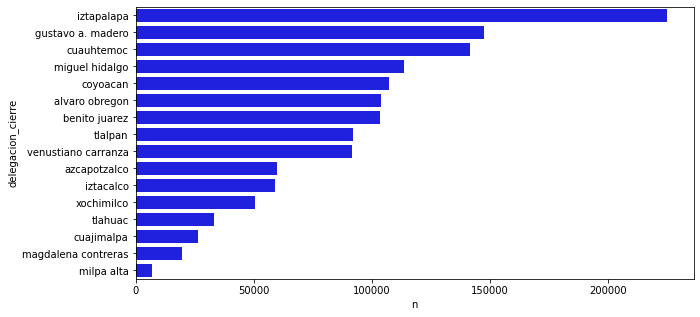

In [11]:
llamadas_x_deleg = data_clean.groupby(['delegacion_cierre']).size().reset_index(name = "n").sort_values("n", ascending = False)

f = plt.subplots(figsize = (10,5))
ax = sns.barplot(data = llamadas_x_deleg, x = 'n', y = 'delegacion_cierre', color= 'b')

In [63]:
orden_delegaciones=['iztapalapa', 'gustavo a. madero', 'cuauhtemoc', 'miguel hidalgo', 'coyoacan', 'alvaro obregon', 'benito juarez',\
                    'tlalpan', 'venustiano carranza', 'azcapotzalco','iztacalco', 'xochimilco', 'tlahuac', 'cuajimalpa', 'magdalena contreras', 'milpa alta']

### Llamadas por año

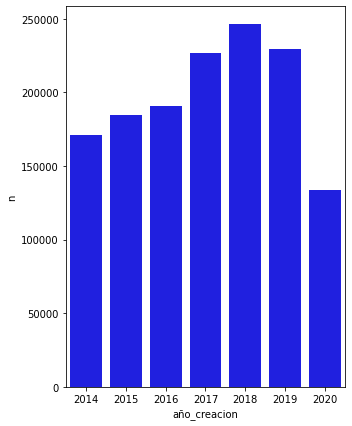

In [12]:
llamadas_x_año = data_clean.query('año_creacion != 2013').groupby(['año_creacion']).size().reset_index(name = "n").sort_values("n", ascending = False)
llamadas_x_año['año_creacion'] = llamadas_x_año['año_creacion'].astype("object")

f = plt.subplots(figsize = (5,7))
ax = sns.barplot(data = llamadas_x_año, y = 'n', x = 'año_creacion', color= 'b')

### Serie de tiempo llamadas

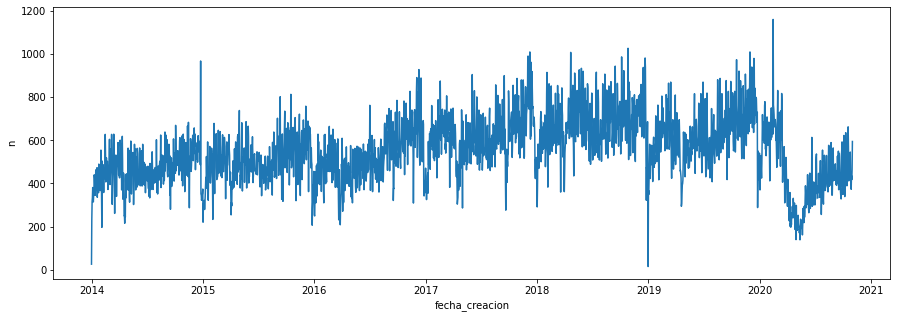

In [13]:
llamadas_diarias = data_clean.groupby(['fecha_creacion']).size().reset_index(name = "n")
f = plt.subplots(figsize = (15,5))
ax = sns.lineplot(data = llamadas_diarias, x = 'fecha_creacion', y = 'n')

### Serie de tiempo de llamadas por codigo_cierre

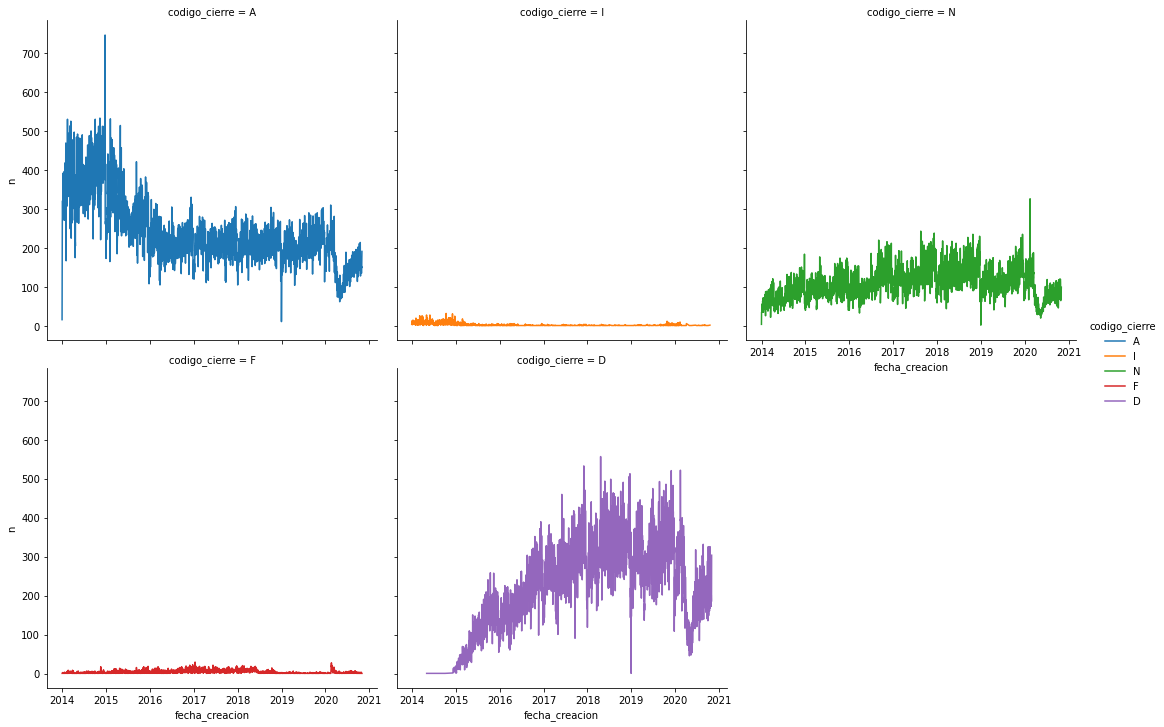

In [14]:
llamadas_diarias_codigo = data_clean.groupby(['fecha_creacion', 'codigo_cierre']).size().reset_index(name = "n")
llamadas_diarias_codigo

#f = plt.subplots(figsize = (15,5))
ax = sns.relplot(data = llamadas_diarias_codigo, x = 'fecha_creacion', y = 'n', hue = 'codigo_cierre', col = 'codigo_cierre', kind = 'line', col_wrap = 3)

### Llamadas según codigo_cierre

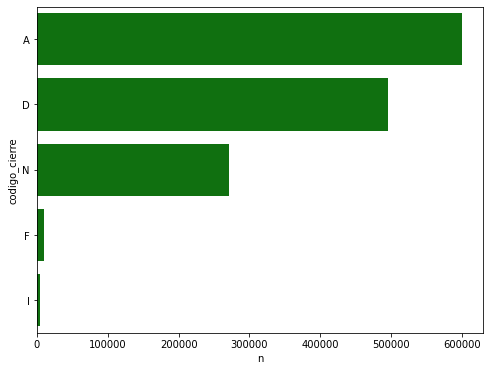

In [16]:
llamadas_x_codigo_cierre = data_clean.groupby(['codigo_cierre']).size().reset_index(name = "n").sort_values("n", ascending = False)
f = plt.subplots(figsize = (8,6))
ax = sns.barplot(data = llamadas_x_codigo_cierre, x = 'n', y = 'codigo_cierre', color= 'g')

## Utilizando únicamente los incidentes 

### Serie de tiempo de llamadas según label

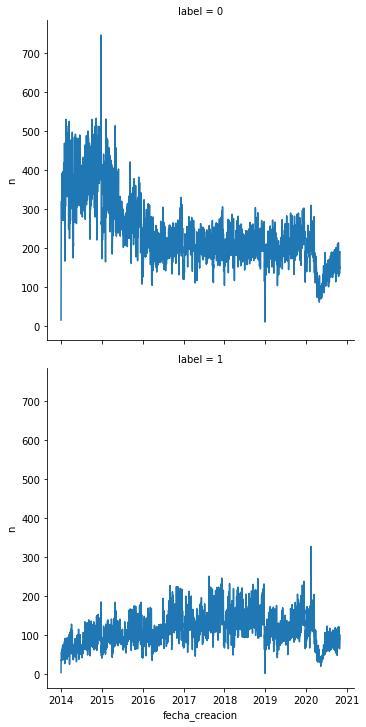

In [74]:
llamadas_diarias_label = data_incidentes.groupby(['fecha_creacion', 'label']).size().reset_index(name = "n")

#f = plt.subplots(figsize = (15,5))
ax = sns.relplot(data = llamadas_diarias_label, x = 'fecha_creacion', y = 'n', col = 'label', kind = 'line', col_wrap = 1)

### Incidente C4

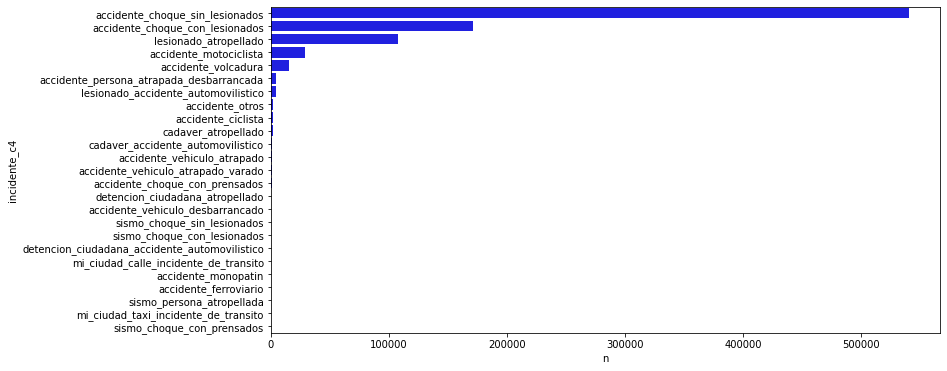

In [70]:
llamadas_x_incidente = data_clean.groupby(['incidente_c4']).size().reset_index(name = "n").sort_values("n", ascending = False)
f = plt.subplots(figsize = (12,6))
ax = sns.barplot(data = llamadas_x_incidente, x = 'n', y = 'incidente_c4', color= 'b')

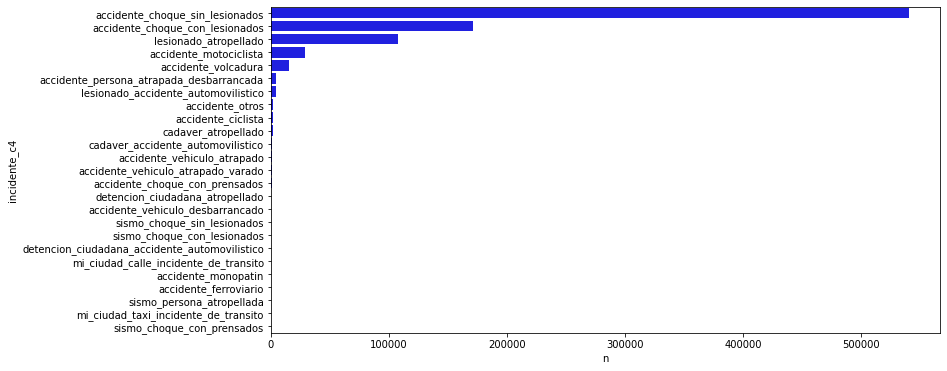

In [15]:
llamadas_x_incidente = data_incidentes.groupby(['incidente_c4']).size().reset_index(name = "n").sort_values("n", ascending = False)
f = plt.subplots(figsize = (12,6))
ax = sns.barplot(data = llamadas_x_incidente, x = 'n', y = 'incidente_c4', color= 'b')

### Incidentes según tipo_entrada

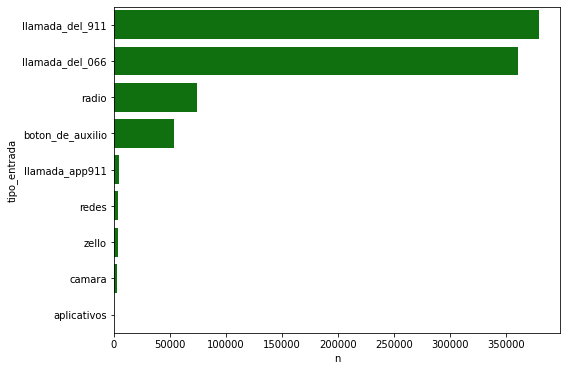

In [76]:
llamadas_x_tipo_entrada = data_incidentes.groupby(['tipo_entrada']).size().reset_index(name = "n").sort_values("n", ascending = False)
f = plt.subplots(figsize = (8,6))
ax = sns.barplot(data = llamadas_x_tipo_entrada, x = 'n', y = 'tipo_entrada', color= 'g')

In [66]:
orden_entradas = ['llamada_del_911', 'llamada_del_066', 'radio', 'boton_de_auxilio', 'llamada_app911', 'redes', 'zello', 'camara', 'aplicativos']

### Clasificación de la llamada

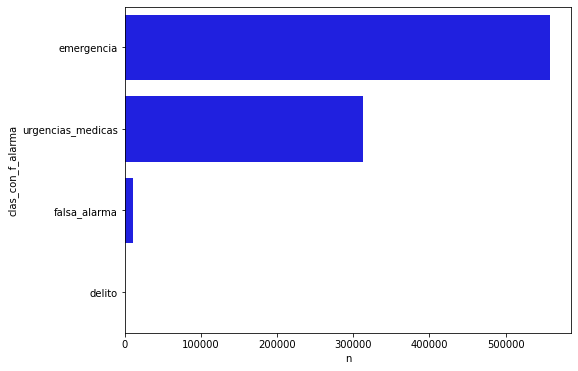

In [55]:
llamadas_x_clas = data_incidentes.groupby(['clas_con_f_alarma']).size().reset_index(name = "n").sort_values("n", ascending = False)
f = plt.subplots(figsize = (8,6))
ax = sns.barplot(data = llamadas_x_clas, x = 'n', y = 'clas_con_f_alarma', color= 'b')

### Incidentes por codigo_cierre y clasificacion

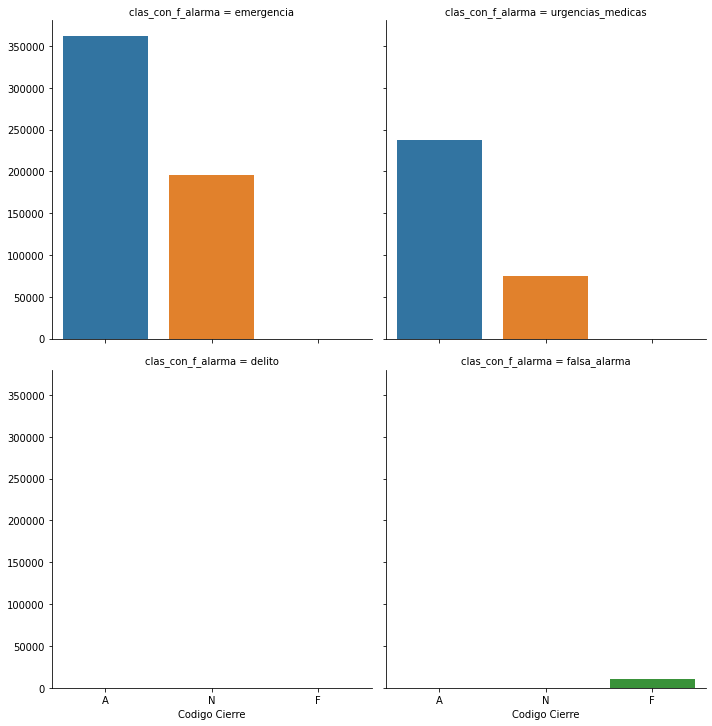

In [71]:
ax = sns.catplot(data = data_incidentes, x = 'codigo_cierre', col = 'clas_con_f_alarma', kind = 'count' , sharey = True, col_wrap = 2,
                 col_order = ['emergencia', 'urgencias_medicas', 'delito', 'falsa_alarma'])
(ax.set_axis_labels("Codigo Cierre", ""))

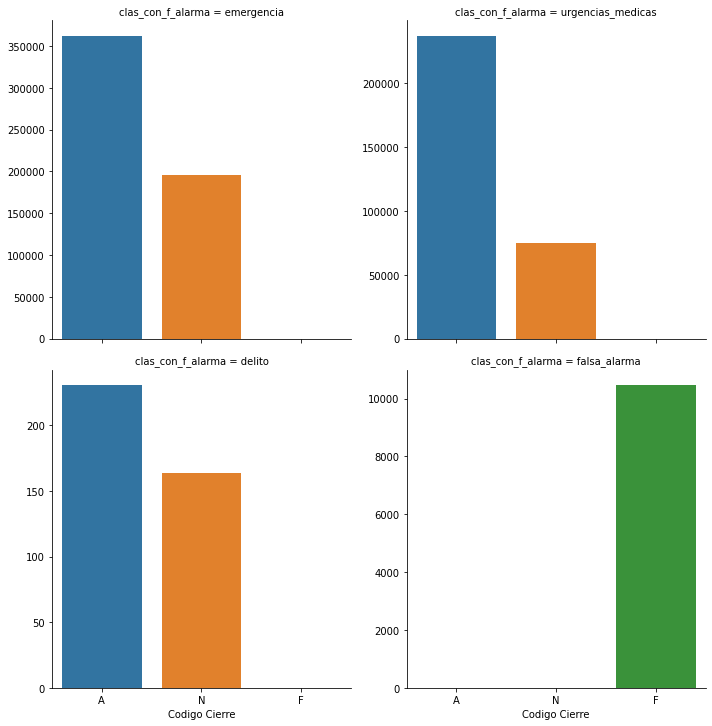

In [72]:
ax = sns.catplot(data = data_incidentes, x = 'codigo_cierre', col = 'clas_con_f_alarma', kind = 'count' , sharey = False,col_wrap = 2,
                 col_order = ['emergencia', 'urgencias_medicas', 'delito', 'falsa_alarma'])
(ax.set_axis_labels("Codigo Cierre", ""))

Se observa que, en su mayoría, la etiqueta FALSA ALARMA de la columna `clas_con_f_alarma` sí coincide con el valor F de `codigo_cierre`

Es importante notar que no se cuenta con la variable `clas_con_f_alarma` al momento de recibir una llamada, por lo que esta variable no es útil para predecir `label`

## Predicción de Label

Observemos las proporciones de label a lo largo de cada nivel de algunas variables

### Delegación

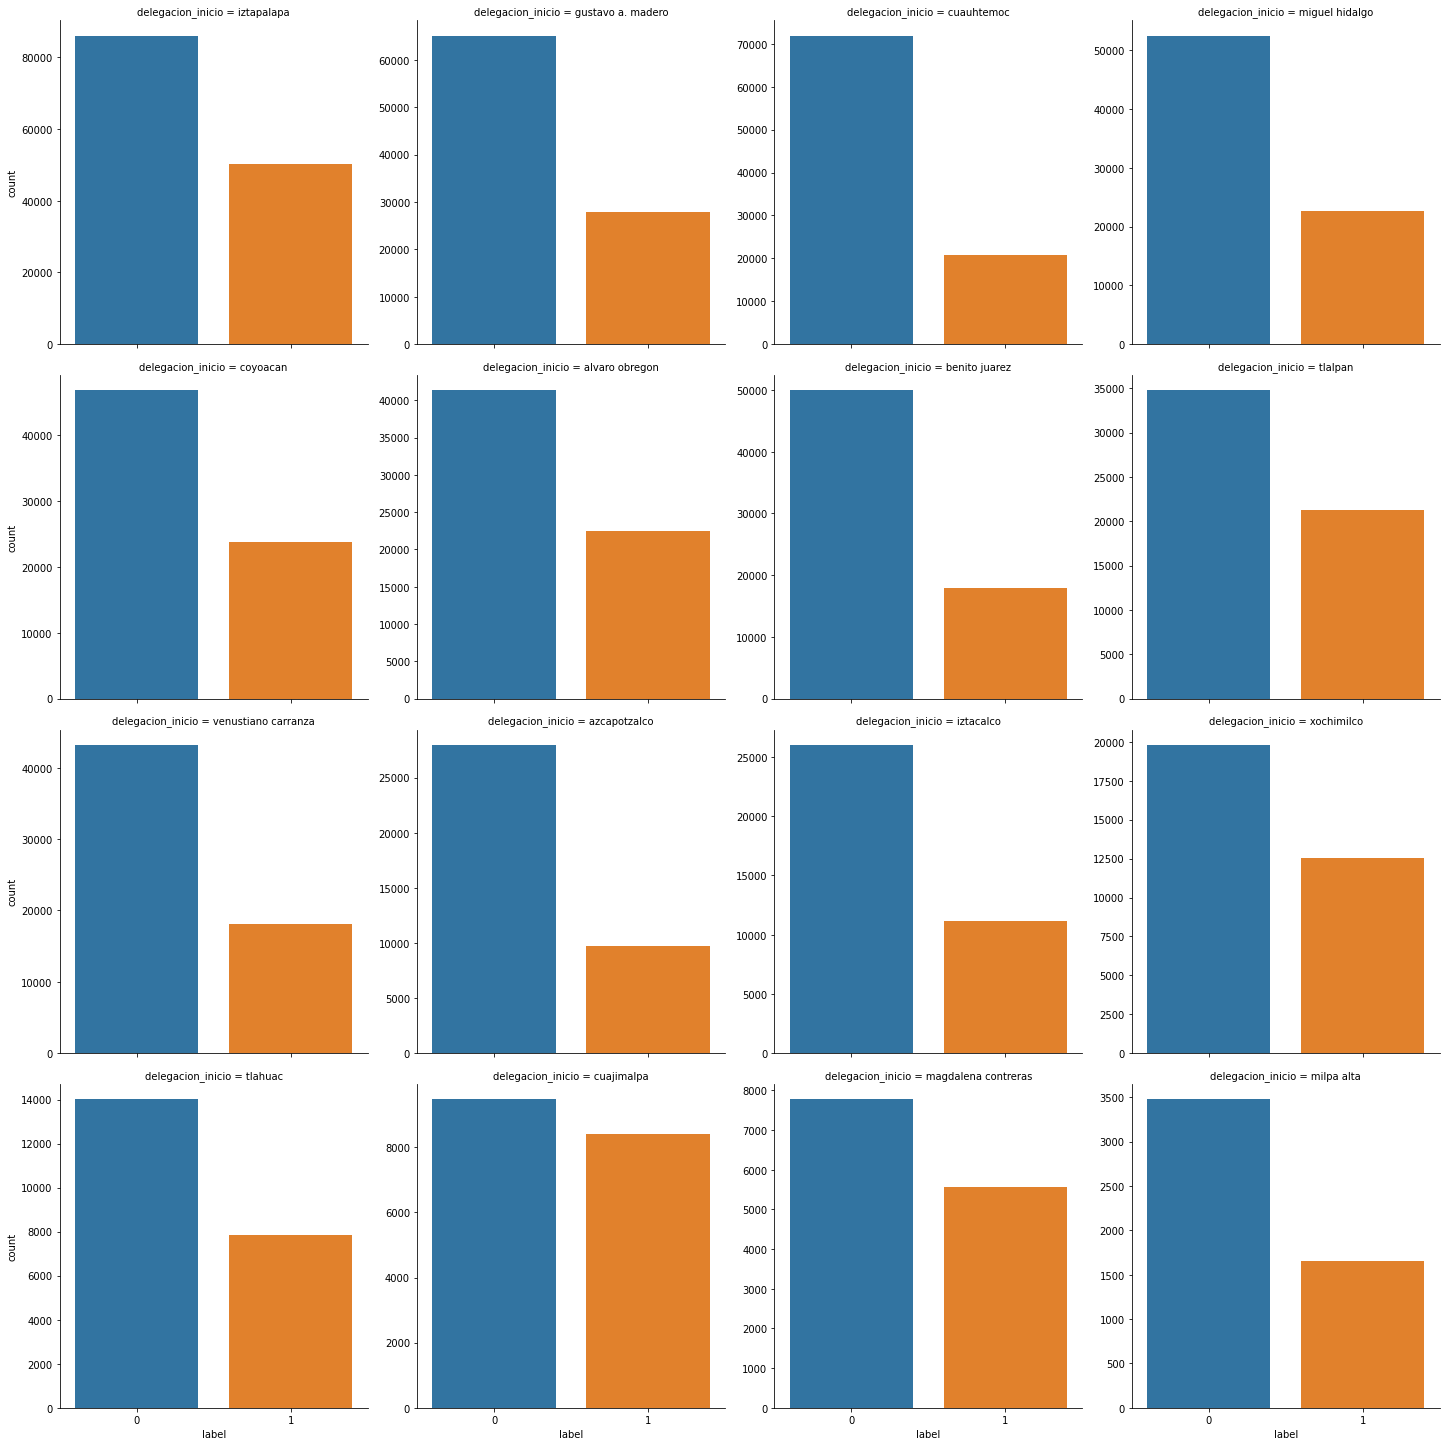

In [64]:
ax = sns.catplot(data = data_incidentes, x = 'label', kind = 'count', col = 'delegacion_inicio', col_wrap= 4, sharey = False,
                col_order = orden_delegaciones )

Vemos que en Cuajimalpa hay un alta proporción de llamadas falsas, mientras que en cuauhtemoc, benito juarez y azcapotzalco hay una proporción mas baja.

### Tipo de entrada

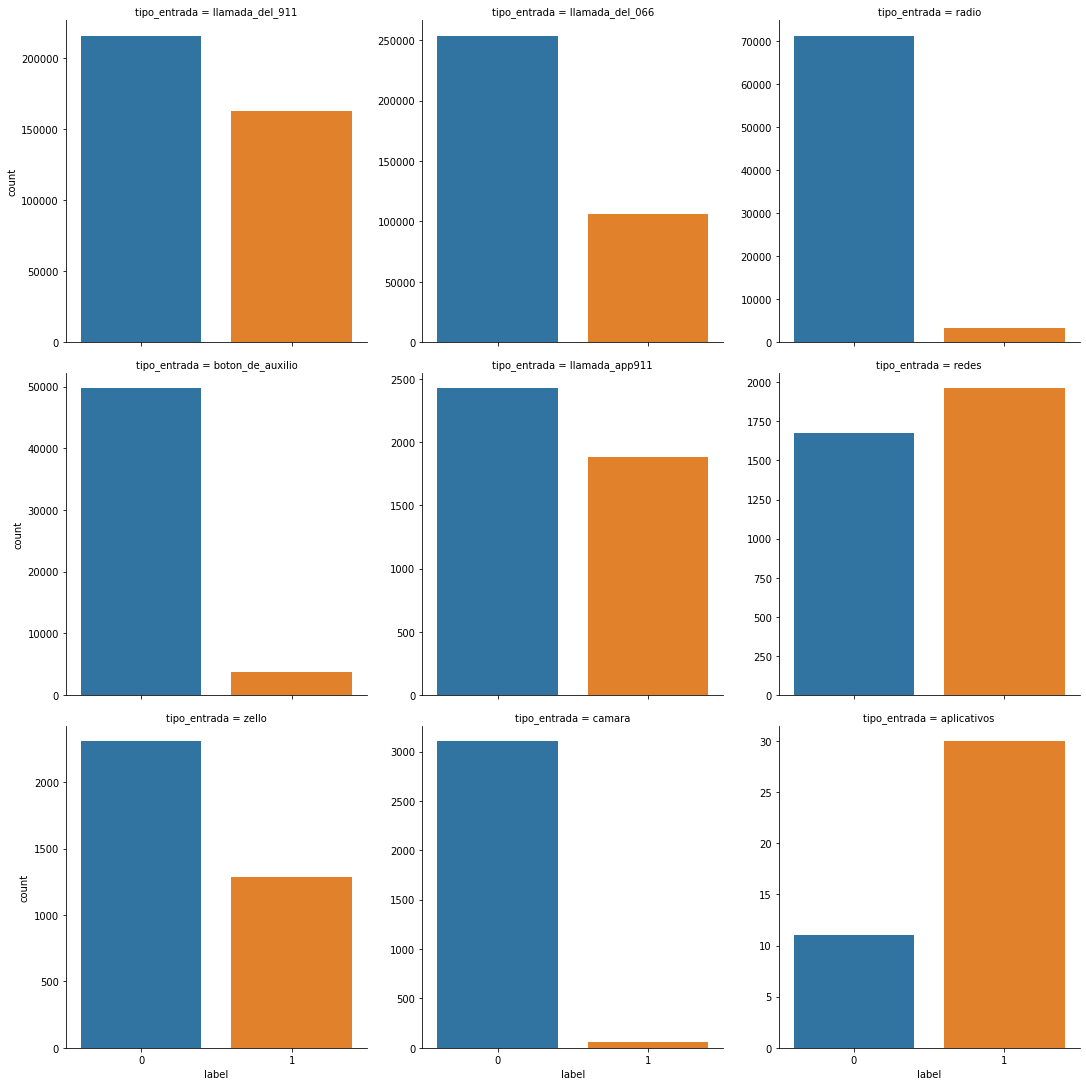

In [61]:
ax = sns.catplot(data = data_incidentes, x = 'label', kind = 'count', col = 'tipo_entrada', col_wrap= 3, sharey = False,
                 col_order = orden_entradas)

Vemos que las entradas por radio tienen proporciones muy bajas de Falsas Alarmas, mientras que redes y aplicativos tienen las propociones más altas

### Dia de la semana en el que se recibe la llamada

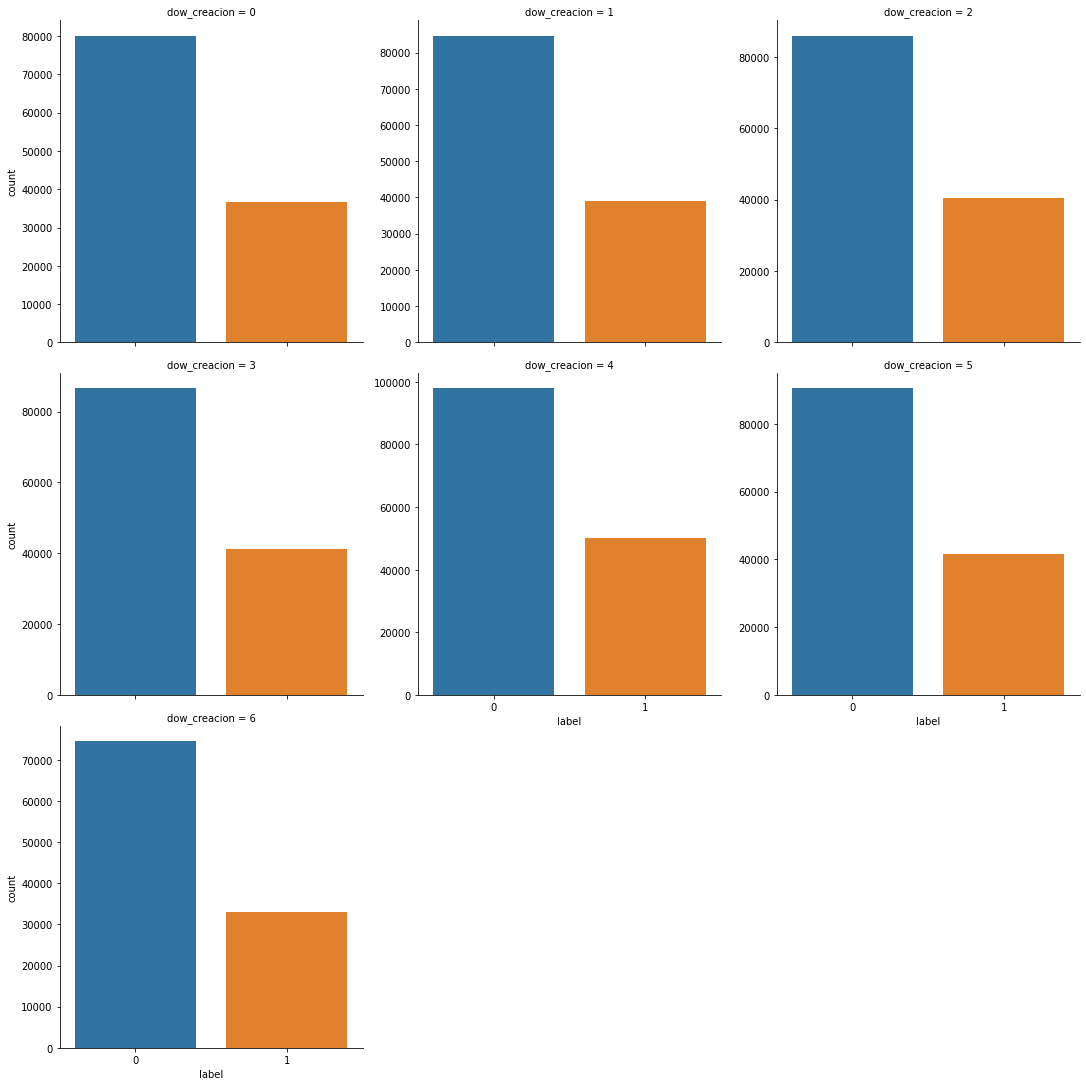

In [73]:
ax = sns.catplot(data = data_incidentes, x = 'label', kind = 'count', col = 'dow_creacion', col_wrap= 3, sharey = False)

En general, no hay mucha diferencia en la proporción de llamadas falsas según el dia de la semana

### Mes creación

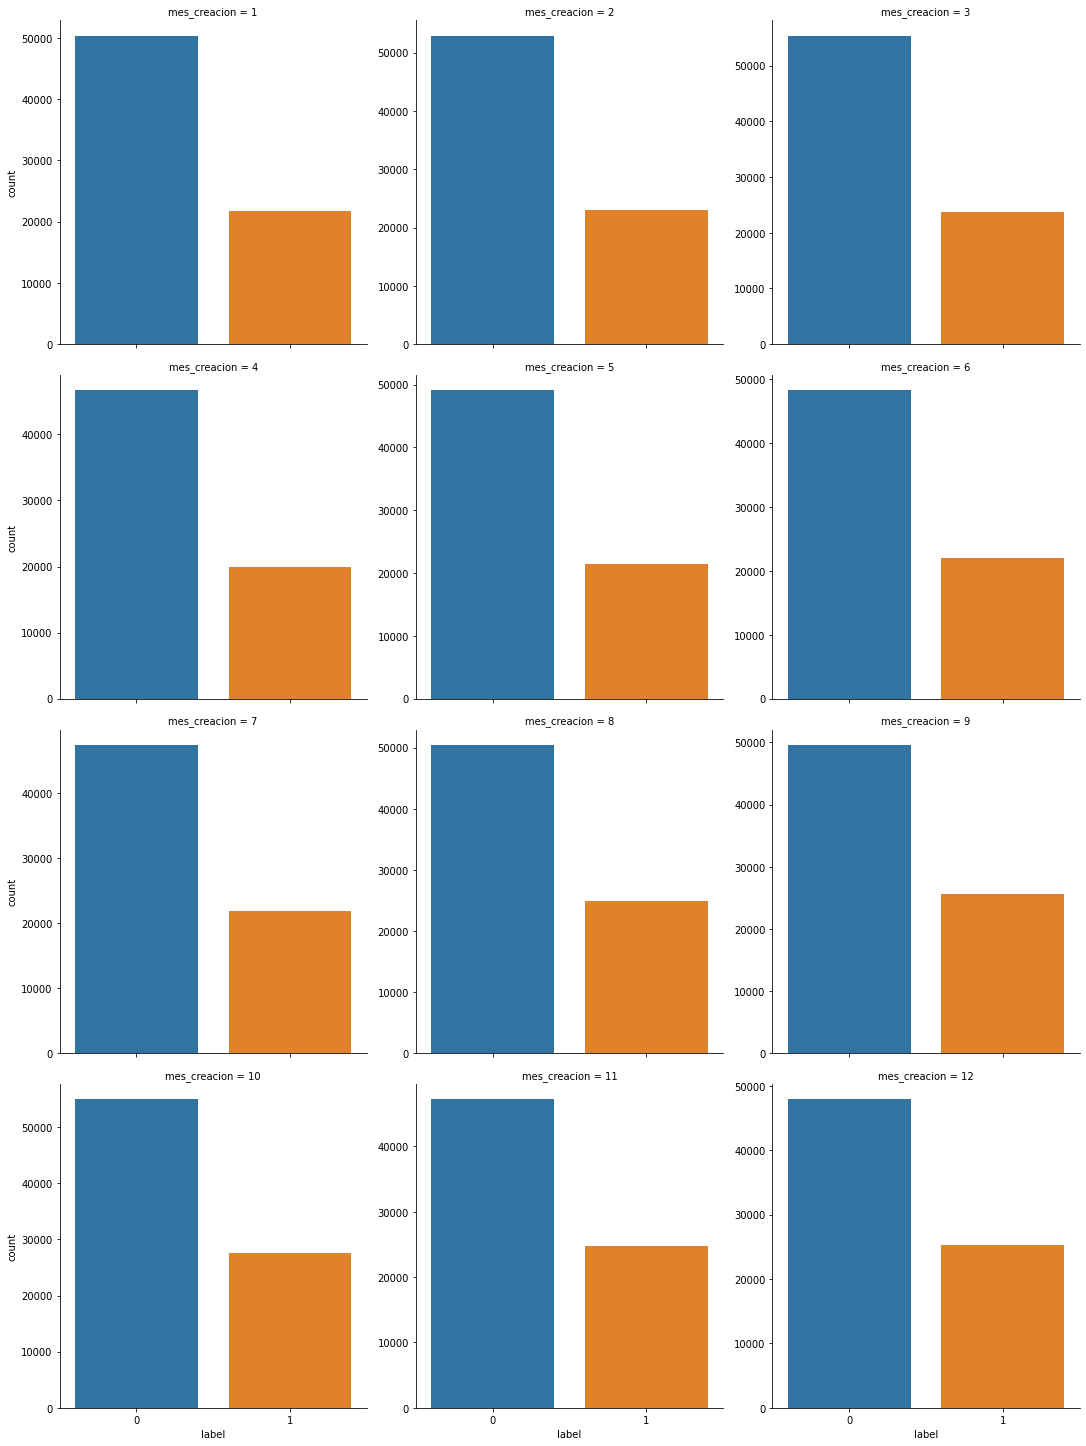

In [69]:
ax = sns.catplot(data = data_incidentes, x = 'label', kind = 'count', col = 'mes_creacion', col_wrap= 3, sharey = False)

Al igual que por día de la semana, no se observan diferencias considerables en la proporción de llamadas falsas según el mes en las que se recibe la llamada